In [9]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
# import plotly.plotly as py
# import plotly.graph_objs as go
import matplotlib.pylab as plt
from bokeh.plotting import figure
from bokeh.io import output_file, show

In [3]:
# BEFORE Cleaning: Read and get the info of the sample dataset of January 
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
# jan.describe()
#jan = jan.drop('Unnamed: 0', 1)
jan.info()
jan.head()
# jan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705805 entries, 0 to 1705804
Data columns (total 20 columns):
taxi_id                   float64
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type              object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtypes: float64(17), object(3)
memory usage: 260.3+ MB


,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [4]:
# AFTER Cleaning: Run the sample dataset of january to confirm the correct procedure of cleaning 
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
jan = jan.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','tolls','extras','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
jan = jan[(jan['pickup_community_area'].notnull()) & (jan['dropoff_community_area'].notnull())]
jan = jan.fillna(0)
jan = jan.loc[(jan["trip_seconds"] > 0) & (jan["trip_miles"] > 0) & (jan["fare"] > 0) ]
#jan = jan.drop('Unnamed: 0', 1)
jan.info()
jan.head()
# jan.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089442 entries, 0 to 1705804
Data columns (total 9 columns):
trip_start_timestamp      1089442 non-null object
trip_end_timestamp        1089442 non-null object
trip_seconds              1089442 non-null float64
trip_miles                1089442 non-null float64
pickup_community_area     1089442 non-null float64
dropoff_community_area    1089442 non-null float64
fare                      1089442 non-null float64
tips                      1089442 non-null float64
payment_type              1089442 non-null object
dtypes: float64(6), object(3)
memory usage: 83.1+ MB


,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,payment_type
0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.4,24.0,24.0,4.50,0.0,Cash
3,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.1,6.0,6.0,7.00,0.0,Cash
5,2016-1-8 18:15:00,2016-1-8 18:45:00,1080.0,6.2,8.0,3.0,17.75,0.0,Cash
7,2016-1-26 04:15:00,2016-1-26 04:15:00,60.0,0.2,16.0,16.0,3.75,0.0,Cash
10,2016-1-25 09:00:00,2016-1-25 09:00:00,480.0,1.3,8.0,8.0,7.00,1.0,Credit Card


In [5]:
# Read the data from each month in 2016 and save them into monthly dataframe called jan, feb, mar,...
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
feb = pd.read_csv('chicago_taxi_trips_2016_02.csv')
mar = pd.read_csv('chicago_taxi_trips_2016_03.csv')
apr = pd.read_csv('chicago_taxi_trips_2016_04.csv')
may = pd.read_csv('chicago_taxi_trips_2016_05.csv')
june = pd.read_csv('chicago_taxi_trips_2016_06.csv')
july = pd.read_csv('chicago_taxi_trips_2016_07.csv')
aug = pd.read_csv('chicago_taxi_trips_2016_08.csv')
sept = pd.read_csv('chicago_taxi_trips_2016_09.csv')
octo = pd.read_csv('chicago_taxi_trips_2016_10.csv')
nov = pd.read_csv('chicago_taxi_trips_2016_11.csv')
dec = pd.read_csv('chicago_taxi_trips_2016_12.csv')

# Clean (Remove) the columns and rows that are not applicable, unknown or missing values from each month
cleaned_2016 = pd.DataFrame()
dfYear = []
for mo in jan, feb, mar, apr, may, june, july, aug, sept, octo, nov, dec:
    mo = mo.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','extras','tolls','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
    mo = mo[(mo['pickup_community_area'].notnull()) & (mo['dropoff_community_area'].notnull())]
    mo = mo.fillna(0)
    mo = mo.loc[(mo["trip_seconds"] > 0) & (mo["trip_miles"] > 0) & (mo["fare"] > 0) ]
    dfYear.append(mo)

cleaned_2016 = pd.concat(dfYear, axis=0, join='outer', ignore_index=True)
# cleaned_2016 = pd.concat(dfYear, ignore_index=True)
#cleaned_2016 = cleaned_2016.drop('Unnamed: 0', 1)
cleaned_2016.info()
cleaned_2016.tail(20)
# cleaned_2016.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335042 entries, 0 to 13335041
Data columns (total 9 columns):
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
payment_type              object
dtypes: float64(6), object(3)
memory usage: 915.6+ MB


,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,payment_type
13335022,2016-12-20 19:00:00,2016-12-20 19:15:00,660.0,0.6,32.0,32.0,6.75,0.00,Cash
13335023,2016-12-23 01:00:00,2016-12-23 01:00:00,360.0,2.4,24.0,28.0,9.00,3.00,Credit Card
13335024,2016-12-16 21:30:00,2016-12-16 21:30:00,780.0,2.1,24.0,7.0,9.50,0.00,Cash
13335025,2016-12-21 08:30:00,2016-12-21 08:30:00,300.0,0.8,32.0,32.0,5.75,3.00,Credit Card
13335026,2016-12-17 21:15:00,2016-12-17 21:15:00,60.0,0.1,8.0,8.0,3.50,0.00,Cash
13335027,2016-12-31 22:00:00,2016-12-31 22:15:00,1380.0,3.5,28.0,8.0,14.25,0.00,Cash
13335028,2016-12-16 16:45:00,2016-12-16 16:45:00,420.0,0.7,32.0,32.0,6.25,0.00,Cash
13335029,2016-12-11 12:00:00,2016-12-11 12:00:00,120.0,0.5,32.0,28.0,6.00,0.00,Cash
13335030,2016-12-11 19:30:00,2016-12-11 19:30:00,240.0,0.8,8.0,8.0,5.50,0.00,Cash
13335031,2016-12-17 13:00:00,2016-12-17 13:15:00,540.0,0.2,8.0,33.0,11.00,0.00,Cash


In [10]:
cleaned_2016.to_csv("taxi_trips_all_months.csv")

NameError: name 'cleaned_2016' is not defined

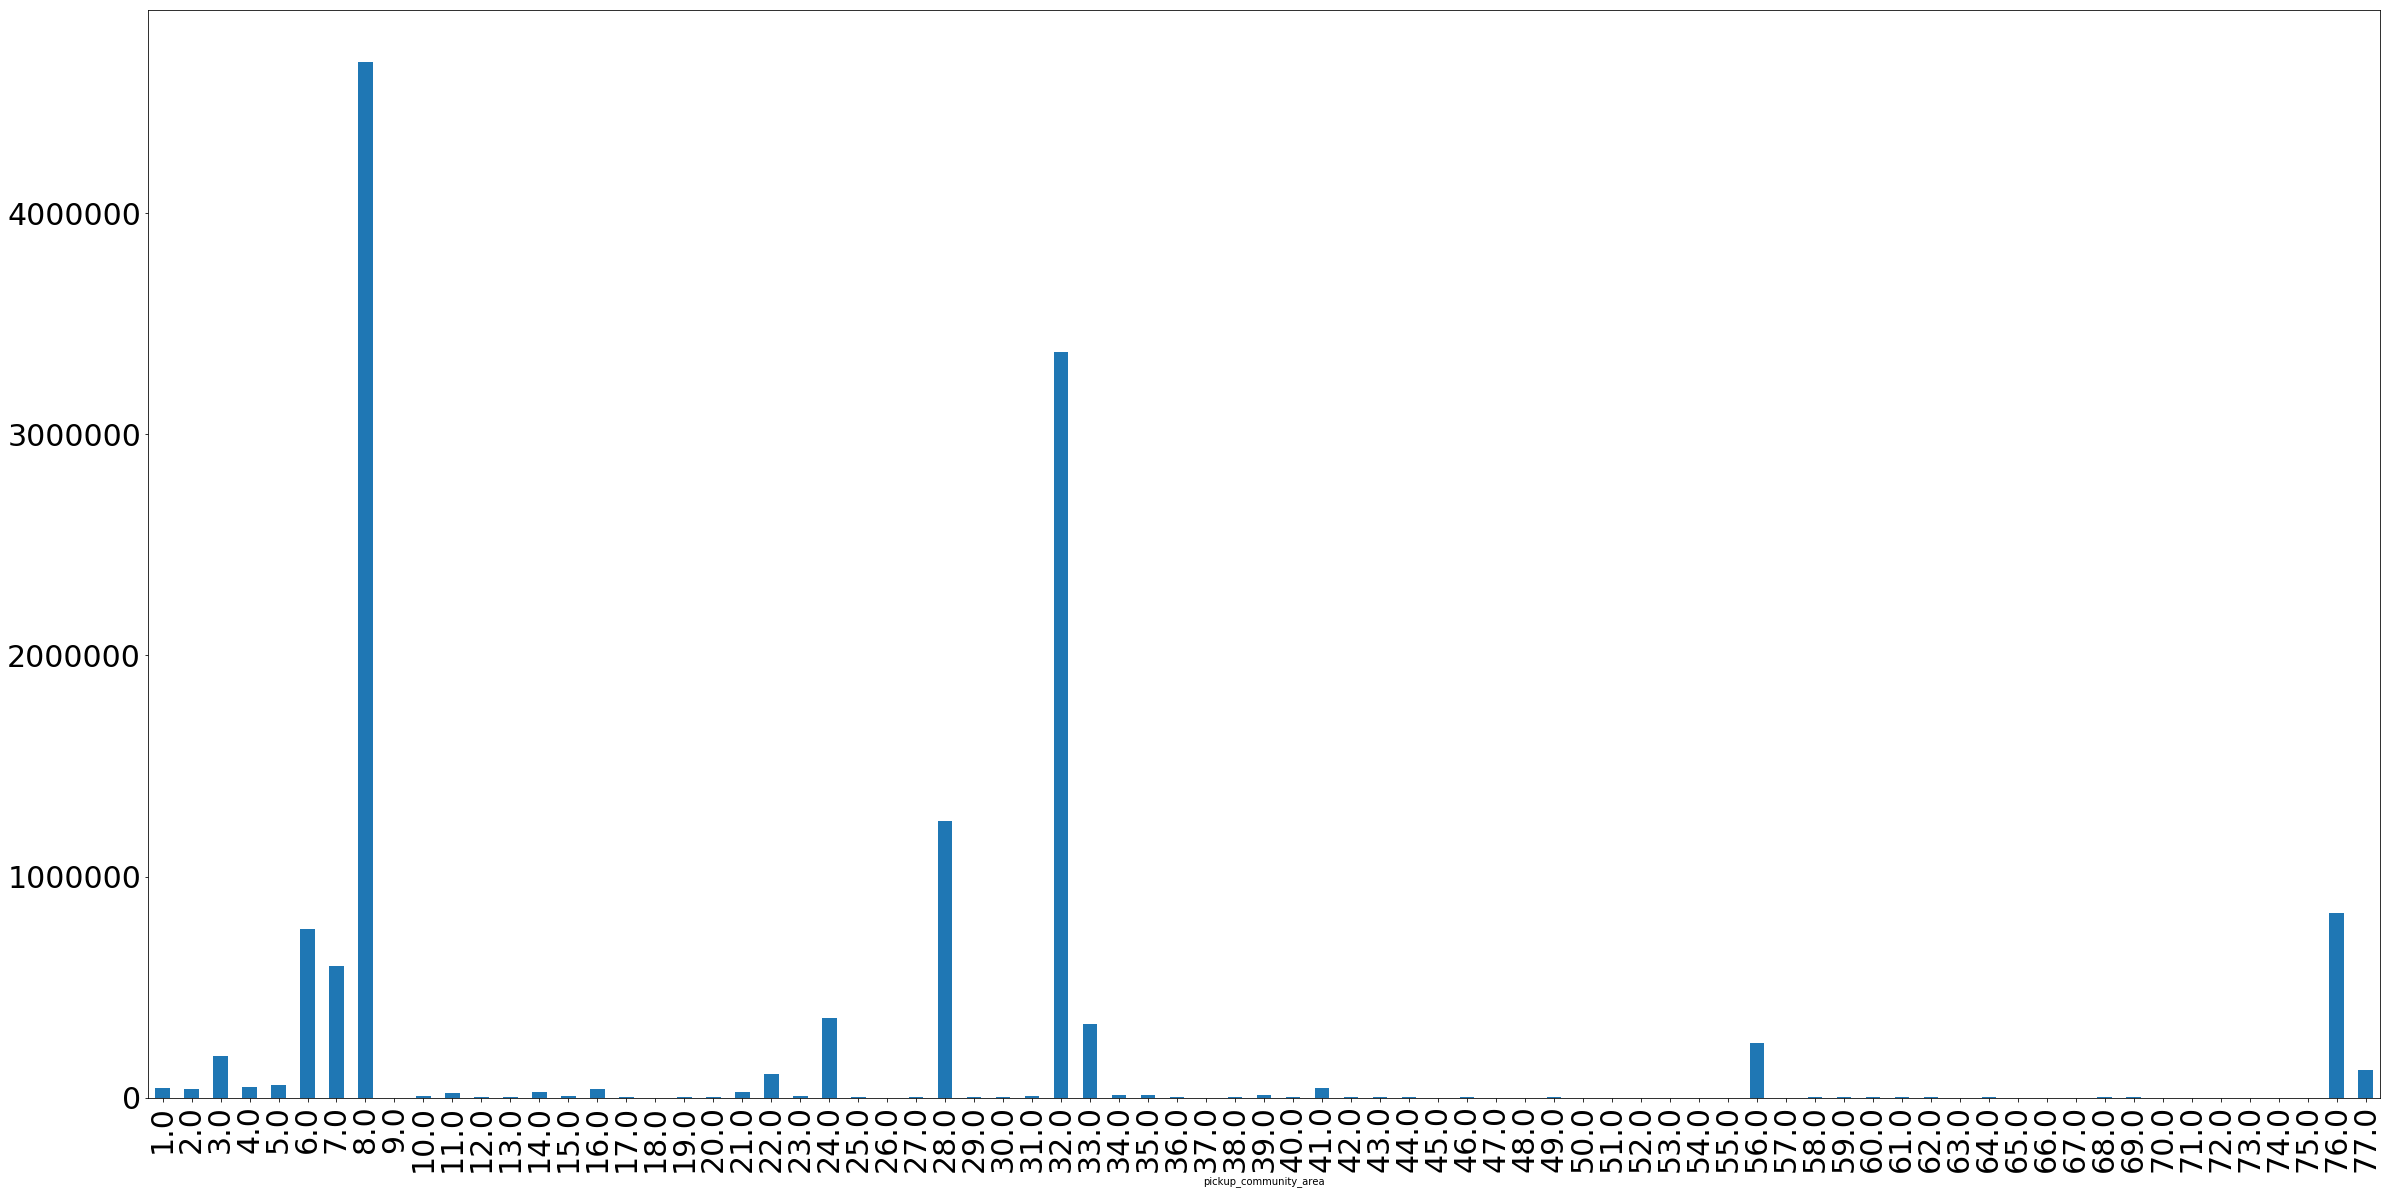

In [19]:
cleaned_2016.groupby('pickup_community_area')['fare'].count().plot(kind='bar', figsize=(40,20), fontsize = 30)
plt.show()

In [12]:
fare = cleaned_2016.groupby('pickup_community_area')['fare'].value_counts() \
                             .head(5)

fare.info()
fare.plot(kind='bar')
#time.plot(kind='bar')
plt.show()

AttributeError: 'Series' object has no attribute 'info'

In [21]:
jan = jan.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','extras','tolls','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
jan = jan[(jan['pickup_community_area'].notnull()) & (jan['dropoff_community_area'].notnull())]
jan = jan.fillna(0)
jan = jan.loc[(jan["trip_seconds"] > 0) & (jan["trip_miles"] > 0) & (jan["fare"] > 0) ]
jan.to_csv("jan_clean.csv")
jan['trip_start_month'] = jan['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,payment_type
0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,24.0,24.0,4.50,0.00,Cash
3,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,6.0,6.0,7.00,0.00,Cash
5,2016-1-8 18:15:00,2016-1-8 18:45:00,1080.0,6.20,8.0,3.0,17.75,0.00,Cash
7,2016-1-26 04:15:00,2016-1-26 04:15:00,60.0,0.20,16.0,16.0,3.75,0.00,Cash
10,2016-1-25 09:00:00,2016-1-25 09:00:00,480.0,1.30,8.0,8.0,7.00,1.00,Credit Card
12,2016-1-13 18:30:00,2016-1-13 19:00:00,1380.0,5.10,32.0,31.0,17.25,5.18,Credit Card
14,2016-1-3 07:45:00,2016-1-3 08:00:00,480.0,0.10,41.0,69.0,9.00,0.00,Cash
16,2016-1-25 10:30:00,2016-1-25 10:30:00,720.0,2.20,7.0,28.0,10.00,0.00,Cash
19,2016-1-1 19:30:00,2016-1-1 19:45:00,660.0,4.10,8.0,6.0,11.85,3.00,Credit Card
20,2016-1-20 07:30:00,2016-1-20 07:45:00,720.0,2.50,8.0,28.0,10.25,1.75,Credit Card


In [11]:
clean_taxi = pd.read_csv("taxi_trips_all_months.csv")

In [3]:
clean_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335042 entries, 0 to 13335041
Data columns (total 10 columns):
Unnamed: 0                int64
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
payment_type              object
dtypes: float64(6), int64(1), object(3)
memory usage: 1017.4+ MB


In [12]:
top5 = clean_taxi.loc[(clean_taxi["pickup_community_area"] == 8.0) | (clean_taxi["pickup_community_area"] == 32.0) | (clean_taxi["pickup_community_area"] == 28.0) | (clean_taxi["pickup_community_area"] == 6.0) | (clean_taxi["pickup_community_area"] == 7.0)]
#top five pickup locations: 8, 32, 28, 6, 7

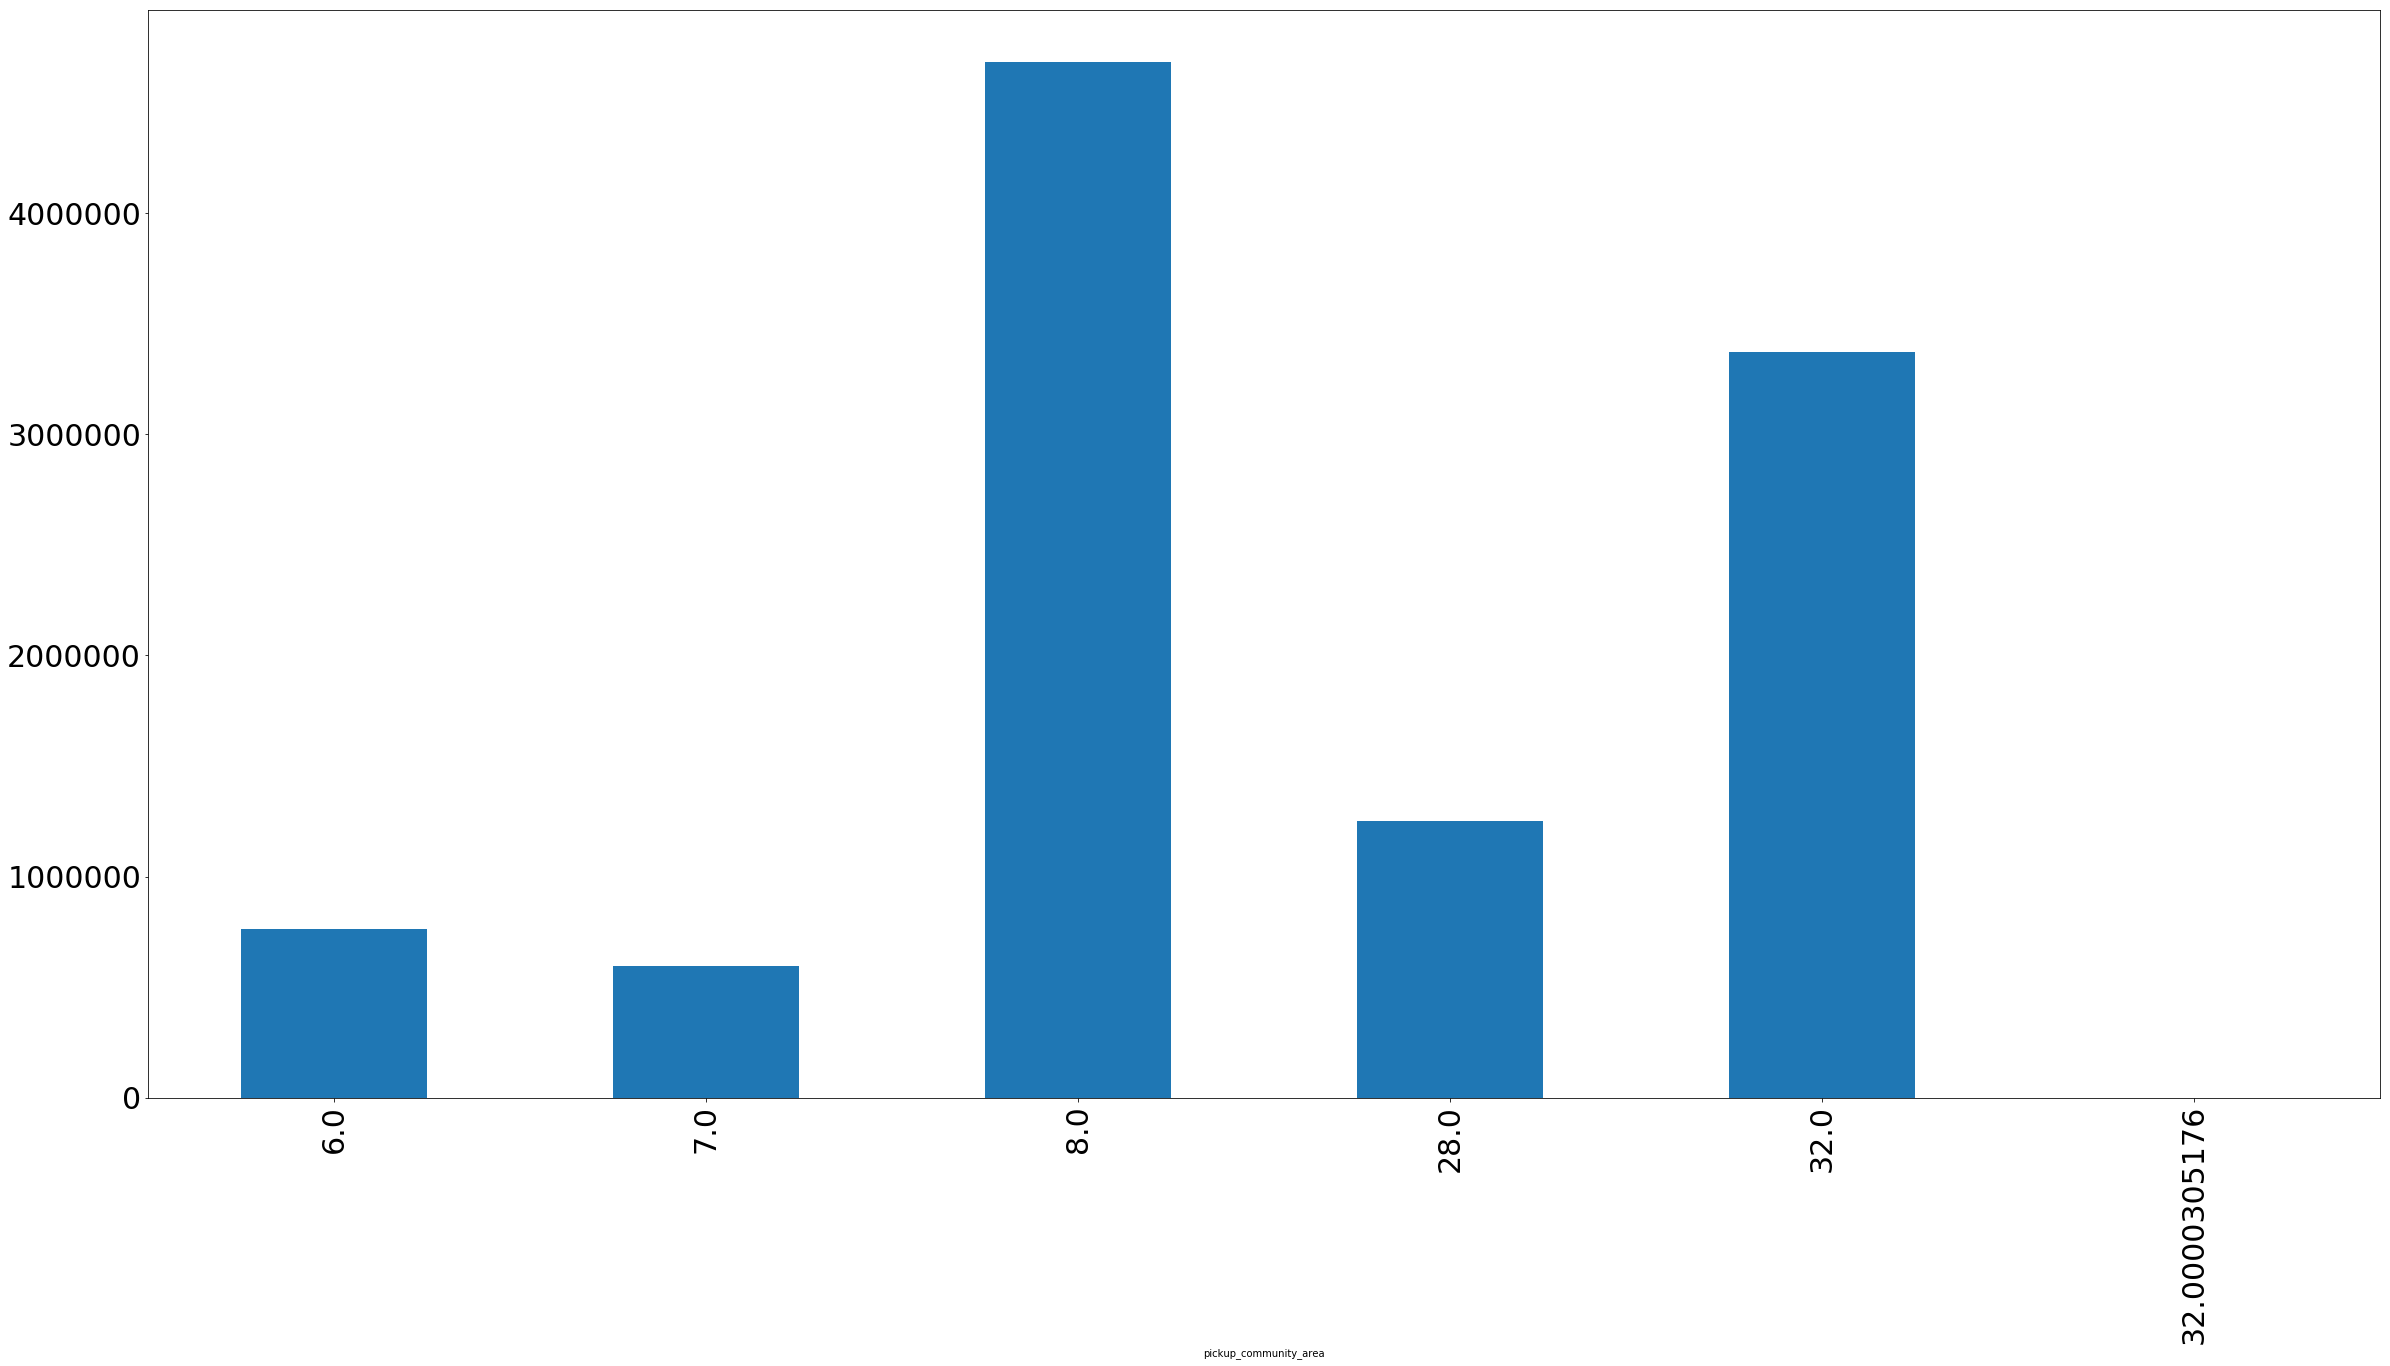

In [15]:
top5.head(5)
top5.groupby('pickup_community_area')['fare'].count().plot(kind='bar', columns = [f] figsize=(40,20), fontsize = 30)
plt.show()